In [57]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

In [58]:
# --- 2. SETUP FOR ACADEMIC STYLE ---

font1 = 18
font2 = 16
font3 = 20

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": font1,
    "axes.labelsize": font3,
    "legend.fontsize": font1,
    "xtick.labelsize": font2,
    "ytick.labelsize": font2,
    "figure.titlesize": font3,
    "text.latex.preamble": r"\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}",
    # Line Widths
    "lines.linewidth": 1.7, # Main plot lines
    "axes.linewidth": 1.,  # Axis spine width
    "grid.linewidth": 1.0,  # Grid line width
    
    # Tick/Marker Properties
    "xtick.major.width": 1.5,
    "ytick.major.width": 1.5,
})

In [59]:
n_cells = (3, 3)
coupling = [1,1,1]

qubits = n_cells[0] * n_cells[1]

lattice = 'triangle'

H_1 = qml.spin.heisenberg(lattice, (2,2), coupling, boundary_condition=True)
H_2 = qml.spin.heisenberg(lattice, (2,3), coupling, boundary_condition=True)
H_3 = qml.spin.heisenberg(lattice, (3,3), coupling, boundary_condition=True)

gs_1 = np.linalg.eigvalsh(H_1.matrix())[0]
gs_2 = np.linalg.eigvalsh(H_2.matrix())[0]
gs_3 = np.linalg.eigvalsh(H_3.matrix())[0]

## Load data

In [60]:
types = 'crx'

In [61]:
loc = "../local_data/TAFH_log1/"

energies_hee_1 = np.load(loc + '/energies_' + types + '_1.npy')
convergences_hee_1 = np.load(loc + '/convergences_' + types + '_1.npy')
grads_hee_1 = np.load(loc + '/grad_norms_' + types + '_1.npy')
grad_variances_hee_1 = np.load(loc + '/grad_variances_' + types + '_1.npy')

energies_ng_1 = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng_1 = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng_1 = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng_1 = np.load(loc + '/grad_variances_' + types + '_2.npy')

In [62]:
loc = "../local_data/TAFH_log2/"

energies_hee_2 = np.load(loc + '/energies_' + types + '_1.npy')
convergences_hee_2 = np.load(loc + '/convergences_' + types + '_1.npy')
grads_hee_2 = np.load(loc + '/grad_norms_' + types + '_1.npy')
grad_variances_hee_2 = np.load(loc + '/grad_variances_' + types + '_1.npy')

energies_ng_2 = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng_2 = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng_2 = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng_2 = np.load(loc + '/grad_variances_' + types + '_2.npy')

In [63]:
loc = "../local_data/TAFH_log3/"

energies_hee_3 = np.load(loc + '/energies_' + types + '_1.npy')
convergences_hee_3 = np.load(loc + '/convergences_' + types + '_1.npy')
grads_hee_3 = np.load(loc + '/grad_norms_' + types + '_1.npy')
grad_variances_hee_3 = np.load(loc + '/grad_variances_' + types + '_1.npy')

energies_ng_3 = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng_3 = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng_3 = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng_3 = np.load(loc + '/grad_variances_' + types + '_2.npy')

## Plots

In [64]:
layers = np.arange(2, 31, 4)

In [65]:
mean_loss_hee_1 = np.mean(energies_hee_1, axis=1) - gs_1
mean_loss_ng_1 = np.mean(energies_ng_1, axis=1) - gs_1

mean_loss_hee_2 = np.mean(energies_hee_2, axis=1) - gs_2
mean_loss_ng_2 = np.mean(energies_ng_2, axis=1) - gs_2

mean_loss_hee_3 = np.mean(energies_hee_3, axis=1) - gs_3
mean_loss_ng_3 = np.mean(energies_ng_3, axis=1) - gs_3

In [66]:
mean_loss_hee_1 = np.mean(grads_hee_1, axis=1) 
mean_loss_ng_1 = np.mean(grads_ng_1, axis=1) 

mean_loss_hee_2 = np.mean(grads_hee_2, axis=1)
mean_loss_ng_2 = np.mean(grads_ng_2, axis=1)

mean_loss_hee_3 = np.mean(grads_hee_3, axis=1)
mean_loss_ng_3 = np.mean(grads_ng_3, axis=1)

In [67]:
min_hee_1 = np.min(energies_hee_1[:,:,-1], axis=1)
min_ng_1 = np.min(energies_ng_1[:,:,-1], axis=1)

min_hee_2 = np.min(energies_hee_2[:,:,-1], axis=1)
min_ng_2 = np.min(energies_ng_2[:,:,-1], axis=1)

min_hee_3 = np.min(energies_hee_3[:,:,-1], axis=1)
min_ng_3 = np.min(energies_ng_3[:,:,-1], axis=1)

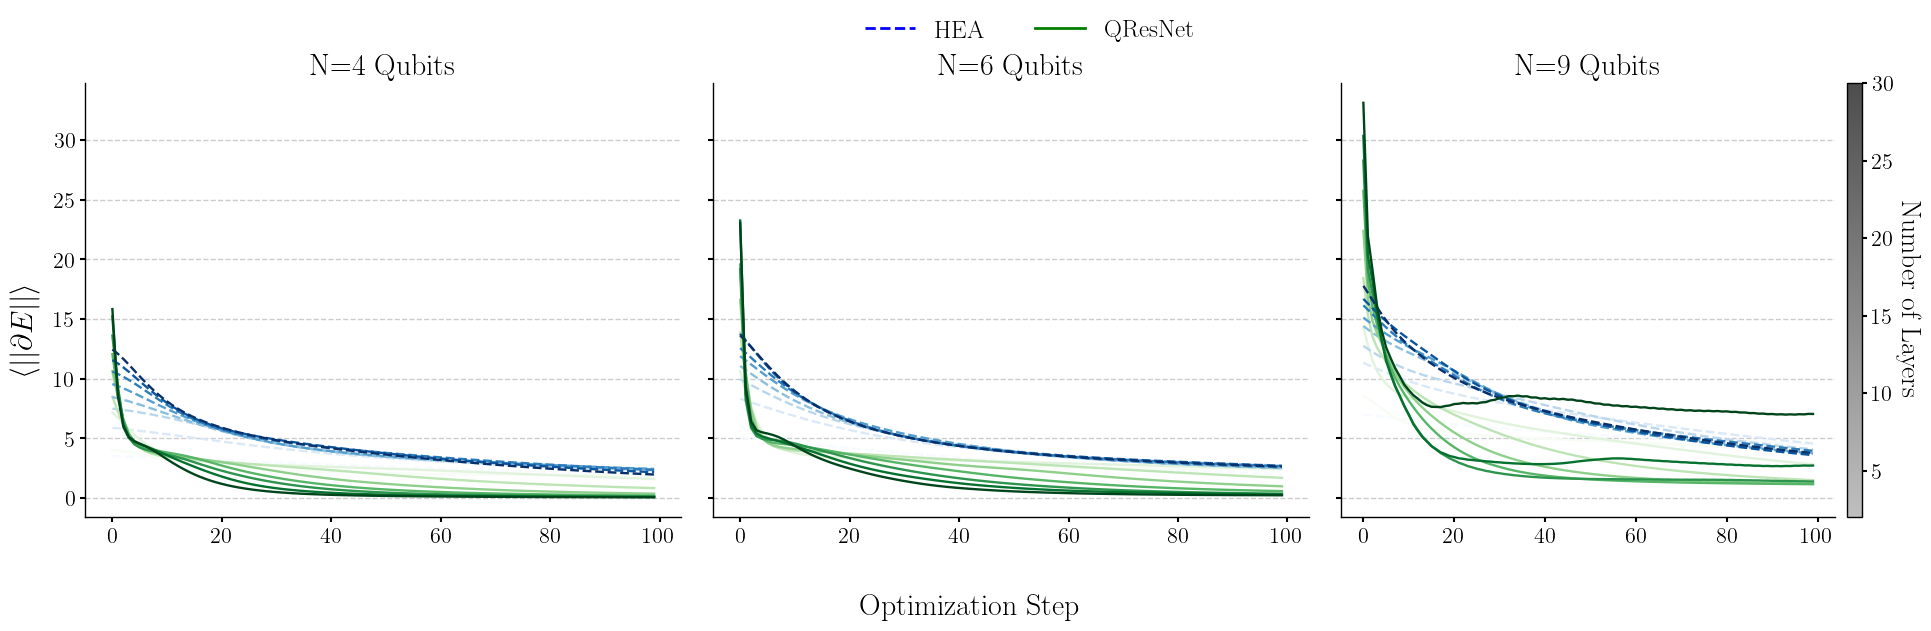

In [68]:
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap # Import this
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), sharey=True)

cmap_hee = plt.get_cmap('Blues')

# Gradient 2: From white to your specified green for qResNet
cmap_ng = plt.get_cmap('Greens')

# Normalization remains the same, as it's based on the number of layers
norm = plt.Normalize(vmin=layers.min(), vmax=layers.max())


# --- 3. PLOTTING (Code is the same) ---
# The loops will now automatically use your new custom colormaps
datasets = [
    (mean_loss_hee_1, mean_loss_ng_1, 'N=4 Qubits'),
    (mean_loss_hee_2, mean_loss_ng_2, 'N=6 Qubits'),
    (mean_loss_hee_3, mean_loss_ng_3, 'N=9 Qubits'),
]

for ax, (hee_data, ng_data, title) in zip(axes, datasets):
    for i, l in enumerate(layers):
        ax.plot(hee_data[i], linestyle='--', color=cmap_hee(norm(l))) # Uses blue gradient
        ax.plot(ng_data[i], linestyle='-', color=cmap_ng(norm(l)))   # Uses green gradient
    ax.set_title(title)
    ax.spines[['right', 'top']].set_visible(False)


for ax in axes:
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(axis='y', linestyle='--', color='gray', alpha=0.4)
    #ax.set_xticks(layers[::2])


# --- 4. LABELS, LEGEND, AND COLORBAR (Code is the same) ---
#fig.suptitle('Model Performance vs. Number of Layers', fontsize=18, fontweight='bold')
fig.supylabel(r'$\langle E \rangle - E_{GS}$')
fig.supylabel(r'$\langle ||\partial E|| \rangle$')
fig.supxlabel('Optimization Step')

legend_elements = [
    Line2D([0], [0], color='blue', lw=2, linestyle='--', label='HEA'),
    Line2D([0], [0], color='green', lw=2, linestyle='-', label='QResNet')
]
#axes[0].legend(handles=legend_elements, loc='upper right')
fig.legend(handles=legend_elements, loc='upper center', ncol=2, frameon=False, bbox_to_anchor=(0.53, 1.05))

cmap_grey = LinearSegmentedColormap.from_list(
    'custom_grey', ['#BFBFBF', '#4D4D4D']
)
# The colorbar can use either gradient to show the layer mapping
sm = plt.cm.ScalarMappable(cmap=cmap_grey, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes[2], orientation='vertical', pad=0.02, aspect=30)
cbar.set_label('Number of Layers', rotation=270, labelpad=20)



# --- 5. FINALIZE AND SHOW ---
plt.tight_layout(rect=[0.0, 0.0, 1, 1])
plt.show()
fig.savefig("TAFH_3.pdf", format="pdf", bbox_inches='tight')

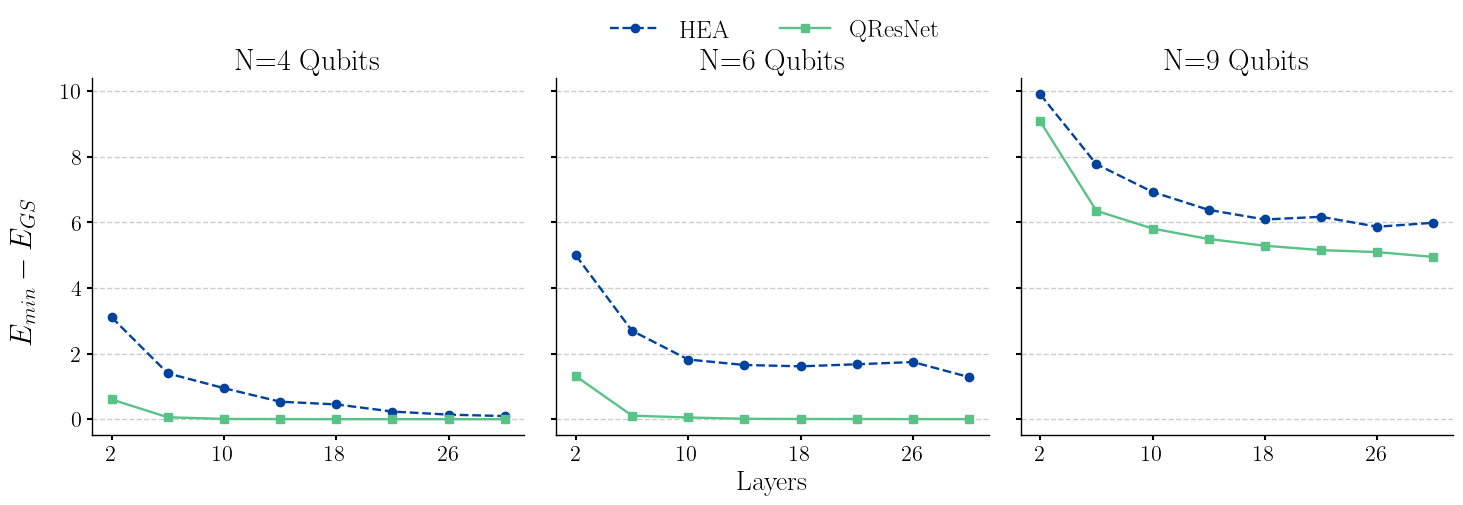

In [69]:
# --- 3. CREATE THE SUBPLOTS ---
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# --- 4. PLOT DATA ON EACH AXIS ---
colors = ['#00429d', '#58c287']

# --- Subplot 1 (N=4 Qubits) ---
axes[0].plot(layers, min_hee_1 - gs_1, marker='o', linestyle='--', label='HEA', color=colors[0])
axes[0].plot(layers, min_ng_1 - gs_1, marker='s', linestyle='-', label='QResNet', color=colors[1])
axes[0].set_title('N=4 Qubits')
# REMOVED: axes[0].legend()

# --- Subplot 2 (N=6 Qubits) ---
axes[1].plot(layers, min_hee_2 - gs_2, marker='o', linestyle='--', color=colors[0])
axes[1].plot(layers, min_ng_2 - gs_2, marker='s', linestyle='-', color=colors[1])
axes[1].set_title('N=6 Qubits')

# --- Subplot 3 (N=8 Qubits) ---
axes[2].plot(layers, min_hee_3 - gs_3, marker='o', linestyle='--', color=colors[0])
axes[2].plot(layers, min_ng_3 - gs_3, marker='s', linestyle='-', color=colors[1])
axes[2].set_title('N=9 Qubits')

# --- 5. GLOBAL STYLING AND LABELS ---
fig.supylabel(r'$E_{min} - E_{GS}$')
axes[1].set_xlabel('Layers')

for ax in axes:
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(axis='y', linestyle='--', color='gray', alpha=0.4)
    ax.set_xticks(layers[::2])

# --- 6. CREATE A SINGLE FIGURE-LEVEL LEGEND ---
# Get handles and labels from the first subplot to create the legend
handles, labels = axes[0].get_legend_handles_labels()
# Place the legend at the top of the figure, centered, with 2 columns
fig.legend(handles, labels, loc='upper center', ncol=2, frameon=False, bbox_to_anchor=(0.53, 1.05))

# Adjust layout to prevent titles/labels from overlapping and make space for legend
plt.tight_layout(rect=[0.0, 0, 1, 1])
plt.show()

fig.savefig("TAFH.pdf", format="pdf", bbox_inches='tight')